# Bagging

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('processed-data.csv')
data.head()


,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0


# EDA

In [5]:
# Checking for missing values
data.isna().sum()


Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Tiredness                316800 non-null  int64
 1   Dry-Cough                316800 non-null  int64
 2   Difficulty-in-Breathing  316800 non-null  int64
 3   Sore-Throat              316800 non-null  int64
 4   None_Sympton             316800 non-null  int64
 5   Pains                    316800 non-null  int64
 6   Nasal-Congestion         316800 non-null  int64
 7   Runny-Nose               316800 non-null  int64
 8   None_Experiencing        316800 non-null  int64
 9   Age_0-9                  316800 non-null  int64
 10  Age_10-19                316800 non-null  int64
 11  Age_20-24                316800 non-null  int64
 12  Age_25-59                316800 non-null  int64
 13  Age_60+                  316800 non-null  int64
 14  Gender_Female            316800 non-

In [7]:
data.describe()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.090909,0.200000,0.200000,0.200000,0.200000,0.200000,0.333333,0.333333,0.250000,0.250000,0.250000
std,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.287480,0.400001,0.400001,0.400001,0.400001,0.400001,0.471405,0.471405,0.433013,0.433013,0.433013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.250000,0.250000,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.dtypes

Tiredness                  int64
Dry-Cough                  int64
Difficulty-in-Breathing    int64
Sore-Throat                int64
None_Sympton               int64
Pains                      int64
Nasal-Congestion           int64
Runny-Nose                 int64
None_Experiencing          int64
Age_0-9                    int64
Age_10-19                  int64
Age_20-24                  int64
Age_25-59                  int64
Age_60+                    int64
Gender_Female              int64
Gender_Male                int64
Severity_Mild              int64
Severity_Moderate          int64
Severity_None              int64
dtype: object

array([[<Axes: title={'center': 'Tiredness'}>,
        <Axes: title={'center': 'Dry-Cough'}>,
        <Axes: title={'center': 'Difficulty-in-Breathing'}>,
        <Axes: title={'center': 'Sore-Throat'}>],
       [<Axes: title={'center': 'None_Sympton'}>,
        <Axes: title={'center': 'Pains'}>,
        <Axes: title={'center': 'Nasal-Congestion'}>,
        <Axes: title={'center': 'Runny-Nose'}>],
       [<Axes: title={'center': 'None_Experiencing'}>,
        <Axes: title={'center': 'Age_0-9'}>,
        <Axes: title={'center': 'Age_10-19'}>,
        <Axes: title={'center': 'Age_20-24'}>],
       [<Axes: title={'center': 'Age_25-59'}>,
        <Axes: title={'center': 'Age_60+'}>,
        <Axes: title={'center': 'Gender_Female'}>,
        <Axes: title={'center': 'Gender_Male'}>],
       [<Axes: title={'center': 'Severity_Mild'}>,
        <Axes: title={'center': 'Severity_Moderate'}>,
        <Axes: title={'center': 'Severity_None'}>, <Axes: >]],
      dtype=object)

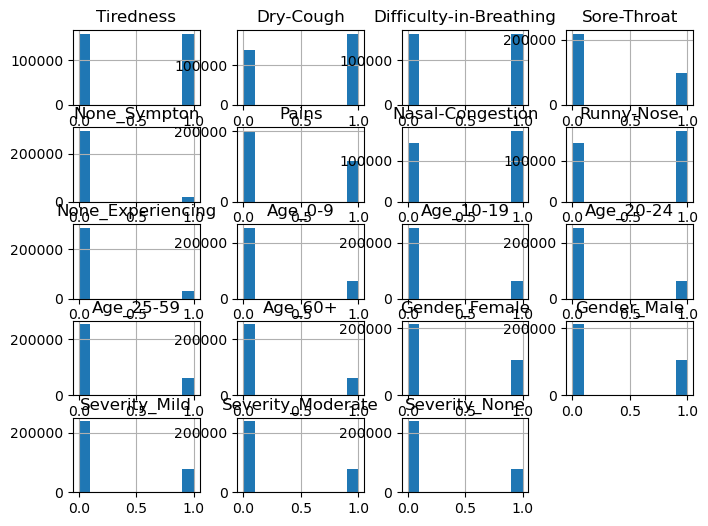

In [9]:
data.hist(figsize=(8,6))

<Axes: >

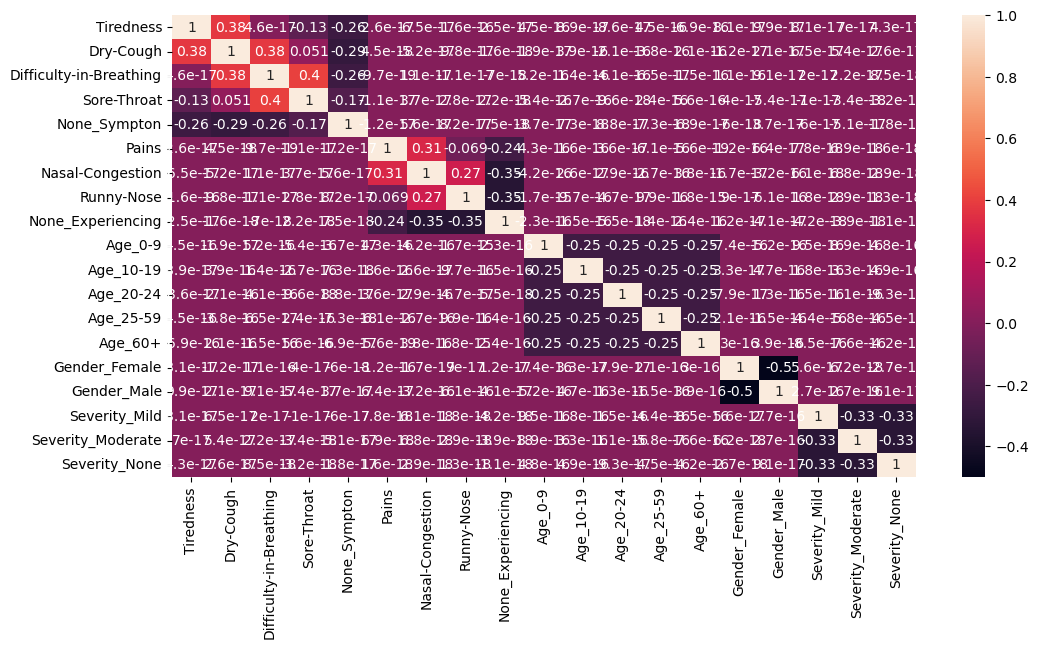

In [10]:
fig=plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)


In [11]:
x=data.iloc[:,:-1]
x.head(2)

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0


In [12]:
y=data.iloc[:,-1:]
y.head(2)

,Severity_None
0,0
1,0


In [13]:
from sklearn.model_selection import train_test_split 
xtrain, xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=2)

In [14]:
xtrain. shape

(253440, 18)

In [15]:
ytrain. shape

(253440, 1)

# Build NB - Gaussian Model

In [16]:
from sklearn.naive_bayes import GaussianNB
gauss_nb = GaussianNB()
gauss_nb.fit(xtrain,ytrain)
print('Training Completed')
print()
ypred_gauss = gauss_nb.predict(xtest)
print('Predicted value is: \t',ypred_gauss)
print()
print('Testing completed')
print('='*75)



# Performance Measure
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
accuracy_gauss=accuracy_score(ytest,ypred_gauss)
print('*'*15 + 'Performance Measures on Gaussian Navie Bayes' + '*'*16)
print('Accuracy score:\t\n',accuracy_score(ytest,ypred_gauss))
print()
print('='*75)
print()
print('Confusion matrix:\t\n',confusion_matrix(ytest,ypred_gauss))
print()
print('='*75)
print()
print('Classification report is:\t\n',classification_report(ytest,ypred_gauss))
print()
print('='*75)

C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Completed

Predicted value is: 	 [0 0 0 ... 1 1 0]

Testing completed
***************Performance Measures on Gaussian Navie Bayes****************
Accuracy score:	
 0.7496527777777777


Confusion matrix:	
 [[31686 15862]
 [    0 15812]]


Classification report is:	
               precision    recall  f1-score   support

           0       1.00      0.67      0.80     47548
           1       0.50      1.00      0.67     15812

    accuracy                           0.75     63360
   macro avg       0.75      0.83      0.73     63360
weighted avg       0.88      0.75      0.77     63360




# Build NB - Multinomial Model

In [17]:
from sklearn.naive_bayes import MultinomialNB
mul_nb = MultinomialNB()
mul_nb.fit(xtrain,ytrain)
print('Training Completed')
print()
ypred_mul_nb = mul_nb.predict(xtest)
print('Predicted value is: \t',ypred_mul_nb)
print()
print('Testing completed')
print('='*75)



#Performance Measure
accuracy_mul_nb=accuracy_score(ytest,ypred_mul_nb)
print('*'*14 + 'Performance Measures on Multinomial Navie Bayes' + '*'*14)
print('Accuracy score:\t\n',accuracy_score(ytest,ypred_mul_nb))
print()
print('='*75)
print()
print('Confusion matrix:\t\n',confusion_matrix(ytest,ypred_mul_nb))
print()
print('='*75)
print()
print('Classification report is:\t\n',classification_report(ytest,ypred_mul_nb))
print()
print('='*75)

Training Completed

Predicted value is: 	 [0 0 0 ... 0 0 0]

Testing completed
**************Performance Measures on Multinomial Navie Bayes**************
Accuracy score:	
 0.7500473484848484


Confusion matrix:	
 [[47444   104]
 [15733    79]]


Classification report is:	
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     47548
           1       0.43      0.00      0.01     15812

    accuracy                           0.75     63360
   macro avg       0.59      0.50      0.43     63360
weighted avg       0.67      0.75      0.65     63360




C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Build NB - Bernoulli Model

In [18]:
from sklearn.naive_bayes import BernoulliNB
ber_nb = BernoulliNB()
ber_nb.fit(xtrain,ytrain)
print('Training Completed')
print()
ypred_ber_nb = ber_nb.predict(xtest)
print('Predicted value is: \t',ypred_ber_nb)
print()
print('Testing completed')
print('='*75)



#Performace Measure
accuracy_ber_nb=accuracy_score(ytest,ypred_ber_nb)
print('*'*15 + 'Performance Measures on Bernoulli Navie Bayes' + '*'*15)
print('Accuracy score:\t\n',accuracy_score(ytest,ypred_ber_nb))
print()
print('='*75)
print()
print('Confusion matrix:\t\n',confusion_matrix(ytest,ypred_ber_nb))
print()
print('='*75)
print()
print('Classification report is:\t\n',classification_report(ytest,ypred_ber_nb))
print()
print('='*75)

C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Completed

Predicted value is: 	 [0 0 0 ... 0 0 0]

Testing completed
***************Performance Measures on Bernoulli Navie Bayes***************
Accuracy score:	
 0.7504419191919192


Confusion matrix:	
 [[47548     0]
 [15812     0]]


Classification report is:	
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     47548
           1       0.00      0.00      0.00     15812

    accuracy                           0.75     63360
   macro avg       0.38      0.50      0.43     63360
weighted avg       0.56      0.75      0.64     63360




C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Ensemble Model

# 1. BaggingClassifier model

In [19]:
#Baggingclassifier
from sklearn.ensemble import BaggingClassifier
bagc=BaggingClassifier(base_estimator= mul_nb,n_estimators=100,random_state=1)
bagc.fit(xtrain,ytrain)#train the model
#test the model
ypred_bagc=bagc.predict(xtest)
print('*'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_bagc))
print('-'*100)
accuracy_bagc=accuracy_score(ytest,ypred_bagc)
print('Accuracy Score:\t',accuracy_bagc)
print('-'*100)
print('Classification Report:\n',classification_report(ytest,ypred_bagc))
print('='*100)


C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


****************************************************************************************************
Confusion Matrix:
 [[47427   121]
 [15707   105]]
----------------------------------------------------------------------------------------------------
Accuracy Score:	 0.750189393939394
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     47548
           1       0.46      0.01      0.01     15812

    accuracy                           0.75     63360
   macro avg       0.61      0.50      0.44     63360
weighted avg       0.68      0.75      0.65     63360



# 2. RandomForestClassifier model

In [20]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rand_for=RandomForestClassifier(n_estimators=10,random_state=1)
rand_for.fit(xtrain,ytrain)#train the model
#test the model
ypred_rand=rand_for.predict(xtest)
print('*'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_rand))
print('-'*100)
accuracy_rand=accuracy_score(ytest,ypred_rand)
print('Accuracy Score:\t',accuracy_rand)
print('-'*100)
print('Classification Report:\n',classification_report(ytest,ypred_rand))
print('='*100)

C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


****************************************************************************************************
Confusion Matrix:
 [[38721  8827]
 [ 8904  6908]]
----------------------------------------------------------------------------------------------------
Accuracy Score:	 0.7201546717171717
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81     47548
           1       0.44      0.44      0.44     15812

    accuracy                           0.72     63360
   macro avg       0.63      0.63      0.63     63360
weighted avg       0.72      0.72      0.72     63360



In [20]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rand_for_1=RandomForestClassifier(n_estimators=10,random_state=1,max_depth=20)
rand_for_1.fit(xtrain,ytrain)#train the model
#test the model
ypred_rand_1=rand_for_1.predict(xtest)
print('*'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_rand_1))
print('-'*100)
accuracy_rand_1=accuracy_score(ytest,ypred_rand_1)
print('Accuracy Score:\t',accuracy_rand_1)
print('-'*100)
print('Classification Report:\n',classification_report(ytest,ypred_rand_1))
print('='*100)

C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


****************************************************************************************************
Confusion Matrix:
 [[38721  8827]
 [ 8904  6908]]
----------------------------------------------------------------------------------------------------
Accuracy Score:	 0.7201546717171717
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81     47548
           1       0.44      0.44      0.44     15812

    accuracy                           0.72     63360
   macro avg       0.63      0.63      0.63     63360
weighted avg       0.72      0.72      0.72     63360



# 3. ExtraTreesClassifier model

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree=ExtraTreesClassifier(n_estimators=20,bootstrap=True,verbose=2)
extra_tree.fit(xtrain,ytrain)#train the model
#test the model
ypred_extra=extra_tree.predict(xtest)
print('*'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_extra))
print('-'*100)
accuracy_extra=accuracy_score(ytest,ypred_extra)
print('Accuracy Score:\t',accuracy_extra)
print('-'*100)
print('Classification Report:\n',classification_report(ytest,ypred_extra))
print('='*100)

C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


****************************************************************************************************
Confusion Matrix:
 [[38377  9171]
 [ 8763  7049]]
----------------------------------------------------------------------------------------------------
Accuracy Score:	 0.7169507575757575
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81     47548
           1       0.43      0.45      0.44     15812

    accuracy                           0.72     63360
   macro avg       0.62      0.63      0.63     63360
weighted avg       0.72      0.72      0.72     63360



# Model with Accuracy scores

In [22]:
scores=[('Gaussian_NB',accuracy_gauss),
        ('Multinomial_NB',accuracy_mul_nb),
        ('Bernoulli_NB',accuracy_ber_nb),
        ('Bagging_classifier',accuracy_bagc),
        ('RandomForest Classifier',accuracy_rand),
        ('RandomForest Classifier with pruning',accuracy_rand),
        ('ExtraTrees Classifier',accuracy_extra)
               
       ]
Acc_scores=pd.DataFrame(scores,columns=['Model','Accuracy_score'])
 
print(Acc_scores.sort_values(by='Accuracy_score',ascending=False))

                                  Model  Accuracy_score
2                          Bernoulli_NB        0.750442
3                    Bagging_classifier        0.750189
1                        Multinomial_NB        0.750047
0                           Gaussian_NB        0.749653
4               RandomForest Classifier        0.720155
5  RandomForest Classifier with pruning        0.720155
6                 ExtraTrees Classifier        0.716951


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Gaussian_NB'),
  Text(1, 0, 'Multinomial_NB'),
  Text(2, 0, 'Bernoulli_NB'),
  Text(3, 0, 'Bagging_classifier'),
  Text(4, 0, 'RandomForest Classifier'),
  Text(5, 0, 'RandomForest Classifier with pruning'),
  Text(6, 0, 'ExtraTrees Classifier')])

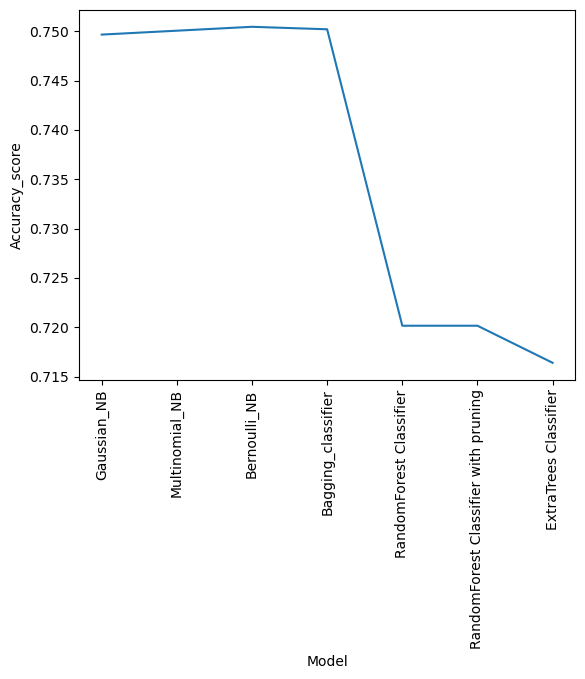

In [23]:
sns.lineplot(x=Acc_scores['Model'],y=Acc_scores['Accuracy_score'],data=Acc_scores)
plt.xticks(rotation=90)

# Build Linear Regression model

In [23]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
print('*'*100)
print('Linear Regression Model')
print('*'*100)
print('\n Training Phase')
lin_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',lin_reg.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_lin_reg=lin_reg.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('Linear Regression - Performance Measures')
print('*'*100)
Accuracy_lin_reg=r2_score(ytest,ypred_lin_reg)
MSE_lin_reg=mean_squared_error(ytest,ypred_lin_reg)
RMSE_lin_reg=np.sqrt(mean_squared_error(ytest,ypred_lin_reg))
print('Accuracy Score - Linear Regression:\t',Accuracy_lin_reg)
print()
print('MSE-linear Regression:\t',MSE_lin_reg)
print()
print('RMSE linear Regression:\t',RMSE_lin_reg)

****************************************************************************************************
Linear Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
Linear Regression - Performance Measures
****************************************************************************************************
Accuracy Score - Linear Regression:	 0.3325120788126361

MSE-linear Regression:	 0.12500636700582424

RMSE linear Regression:	 0.3535623947846041


# Build Decision Tree Regression model

In [24]:
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor()
print('*'*100)
print('DT Regression Model')
print('*'*100)
print('\n Training Phase')
dt_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',dt_reg.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_dt_reg=dt_reg.predict(xtest)

print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('Linear Regression - Performance Measures')
print('*'*100)
Accuracy_dt_reg=r2_score(ytest,ypred_dt_reg)
MSE_dt_reg=mean_squared_error(ytest,ypred_dt_reg)
RMSE_dt_reg=np.sqrt(mean_squared_error(ytest,ypred_dt_reg))
print('Accuracy Score - DT Regression:\t',Accuracy_dt_reg)
print()
print('MSE-DT Regression:\t',MSE_dt_reg)
print()
print('RMSE DT Regression:\t',RMSE_dt_reg)

****************************************************************************************************
DT Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
Linear Regression - Performance Measures
****************************************************************************************************
Accuracy Score - DT Regression:	 0.3189093244197392

MSE-DT Regression:	 0.12755387513886093

RMSE DT Regression:	 0.35714685374347194


# 1. BaggingRegressor model

In [25]:
from sklearn.ensemble import BaggingRegressor
bagc=BaggingRegressor(base_estimator=lin_reg,n_estimators=15)
print('*'*100)
print('Bagging Regression Model')
print('*'*100)
print('\n Training Phase')
bagc.fit(xtrain,ytrain)
print('Hyperparameter:\n',bagc.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_bagc=bagc.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('Bagging Regression - Performance Measures')
print('*'*100)
Accuracy_bagc=r2_score(ytest,ypred_bagc)
MSE_bagc=mean_squared_error(ytest,ypred_bagc)
RMSE_bagc=np.sqrt(mean_squared_error(ytest,ypred_bagc))
print('Accuracy Score - Bagging Regression:\t',Accuracy_bagc)
print()
print('MSE-Bagging Regression:\t',MSE_bagc)
print()
print('RMSE-Bagging Regression:\t',RMSE_bagc)


****************************************************************************************************
Bagging Regression Model
****************************************************************************************************

 Training Phase


C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Hyperparameter:
 {'base_estimator__copy_X': True, 'base_estimator__fit_intercept': True, 'base_estimator__n_jobs': None, 'base_estimator__positive': False, 'base_estimator': LinearRegression(), 'bootstrap': True, 'bootstrap_features': False, 'estimator': None, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 15, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
Bagging Regression - Performance Measures
****************************************************************************************************
Accuracy Score - Bagging Regression:	 0.33251414376319

MSE-Bagging Regression:	 0.1250059802842693

RMSE-Bagging Regression:	 0.35356184789124134


# 2. RandomForestRegressor model

In [26]:
from sklearn.ensemble import RandomForestRegressor
rand_for=RandomForestRegressor(n_estimators=10,random_state=1)
print('*'*100)
print('RandomForset Regression Model')
print('*'*100)
print('\n Training Phase')
rand_for.fit(xtrain,ytrain)
print('Hyperparameter:\n',rand_for.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_rand_for=rand_for.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('RandomForest Regression - Performance Measures')
print('*'*100)
Accuracy_rand_for=r2_score(ytest,ypred_rand_for)
MSE_rand_for=mean_squared_error(ytest,ypred_rand_for)
RMSE_rand_for=np.sqrt(mean_squared_error(ytest,ypred_rand_for))
print('Accuracy Score - RandomForest Regression:\t',Accuracy_rand_for)
print()
print('RandomForest Regression:\t',MSE_rand_for)
print()
print('RandomForest Regression:\t',RMSE_rand_for)

****************************************************************************************************
RandomForset Regression Model
****************************************************************************************************

 Training Phase


C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Hyperparameter:
 {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
RandomForest Regression - Performance Measures
****************************************************************************************************
Accuracy Score - RandomForest Regression:	 0.3176561361094977

RandomForest Regression:	 0.12778857079831016

RandomForest Regression:	 0.35747527298865045


In [27]:
from sklearn.ensemble import RandomForestRegressor
rand_for_1=RandomForestRegressor(n_estimators=10,random_state=1,max_depth=20)
print('*'*100)
print('RandomForset Regression Model')
print('*'*100)
print('\n Training Phase')
rand_for_1.fit(xtrain,ytrain)
print('Hyperparameter:\n',rand_for_1.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_rand_for_1=rand_for_1.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('RandomForest Regression - Performance Measures')
print('*'*100)
Accuracy_rand_for_1=r2_score(ytest,ypred_rand_for_1)
MSE_rand_for_1=mean_squared_error(ytest,ypred_rand_for_1)
RMSE_rand_for_1=np.sqrt(mean_squared_error(ytest,ypred_rand_for_1))
print('Accuracy Score - RandomForest Regression:\t',Accuracy_rand_for_1)
print()
print('RandomForest Regression:\t',MSE_rand_for_1)
print()
print('RandomForest Regression:\t',RMSE_rand_for_1)

****************************************************************************************************
RandomForset Regression Model
****************************************************************************************************

 Training Phase


C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Hyperparameter:
 {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
RandomForest Regression - Performance Measures
****************************************************************************************************
Accuracy Score - RandomForest Regression:	 0.3176561361094977

RandomForest Regression:	 0.12778857079831016

RandomForest Regression:	 0.35747527298865045


# 3.ExtraTressRegressor model

In [28]:
from sklearn.ensemble import ExtraTreesRegressor
extra_tree=ExtraTreesRegressor(n_estimators=10,random_state=1,max_depth=20)
print('*'*100)
print('ExtraTrees Regressor Model')
print('*'*100)
print('\n Training Phase')
extra_tree.fit(xtrain,ytrain)
print('Hyperparameter:\n',extra_tree.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_extra_tree=extra_tree.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('ExtraTrees Regression - Performance Measures')
print('*'*100)
Accuracy_extra_tree=r2_score(ytest,ypred_extra_tree)
MSE_extra_tree=mean_squared_error(ytest,ypred_extra_tree)
RMSE_extra_tree=np.sqrt(mean_squared_error(ytest,ypred_extra_tree))
print('Accuracy Score - ExtraTrees Regression Regression:\t',Accuracy_extra_tree)
print()
print('ExtraTrees Regression Regression:\t',MSE_extra_tree)
print()
print('ExtraTrees Regression Regression:\t',RMSE_extra_tree)

****************************************************************************************************
ExtraTrees Regressor Model
****************************************************************************************************

 Training Phase


C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Hyperparameter:
 {'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
ExtraTrees Regression - Performance Measures
****************************************************************************************************
Accuracy Score - ExtraTrees Regression Regression:	 0.3189093244197393

ExtraTrees Regression Regression:	 0.1275538751388609

ExtraTrees Regression Regression:	 0.3571468537434719


# Model with Accuracy scores

In [30]:
scores=[('Linear Regressor',Accuracy_lin_reg),
        ('Decision Tree Regressor',Accuracy_dt_reg),
        (' Bagging Regressor',Accuracy_bagc),
        ('RandomForest Regressor',Accuracy_rand_for),
        ('RandomForest Regressor',Accuracy_rand_for_1),
        ('ExtraTrees Regressor',Accuracy_extra_tree),
       ]
Acc_scores=pd.DataFrame(scores,columns=['Model','Accuracy_score'])
print(Acc_scores.sort_values(by='Accuracy_score',ascending=False))

                     Model  Accuracy_score
2        Bagging Regressor        0.332514
0         Linear Regressor        0.332512
5     ExtraTrees Regressor        0.318909
1  Decision Tree Regressor        0.318909
3   RandomForest Regressor        0.317656
4   RandomForest Regressor        0.317656


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Linear Regressor'),
  Text(1, 0, 'Decision Tree Regressor'),
  Text(2, 0, ' Bagging Regressor'),
  Text(3, 0, 'RandomForest Regressor'),
  Text(4, 0, 'ExtraTrees Regressor')])

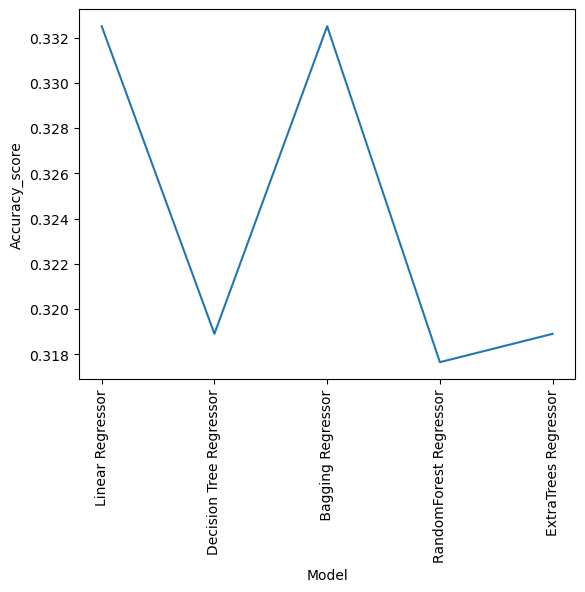

In [31]:
sns.lineplot(x=Acc_scores['Model'],y=Acc_scores['Accuracy_score'],data=Acc_scores)
plt.xticks(rotation=90)

# Boosting

# 1.AdaBoostClassifier model

In [37]:
#Boostingclassifier
from sklearn.ensemble import  AdaBoostClassifier
ada=AdaBoostClassifier(base_estimator=mul_nb,n_estimators=50,random_state=20)
ada.fit(xtrain,ytrain)#train the model
#test the model
ypred_ada=ada.predict(xtest)
print('*'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_ada))
print('-'*100)
accuracy_ada=accuracy_score(ytest,ypred_ada)
print('Accuracy Score:\t',accuracy_ada)
print('-'*100)
print('Classification Report:\n',classification_report(ytest,ypred_ada))
print('='*100)

C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


****************************************************************************************************
Confusion Matrix:
 [[44478  3070]
 [12709  3103]]
----------------------------------------------------------------------------------------------------
Accuracy Score:	 0.7509627525252526
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.94      0.85     47548
           1       0.50      0.20      0.28     15812

    accuracy                           0.75     63360
   macro avg       0.64      0.57      0.57     63360
weighted avg       0.71      0.75      0.71     63360



# 2.GradientBoostClassifier model

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
grad_boost=GradientBoostingClassifier(n_estimators=50)
grad_boost.fit(xtrain,ytrain)#train the model
#test the model
ypred_grad_boost=grad_boost.predict(xtest)
print('*'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_grad_boost))
print('-'*100)
accuracy_grad_boost=accuracy_score(ytest,ypred_grad_boost)
print('Accuracy Score:\t',accuracy_grad_boost)
print('-'*100)
print('Classification Report:\n',classification_report(ytest,ypred_grad_boost))
print('='*100)

C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


****************************************************************************************************
Confusion Matrix:
 [[42551  4997]
 [11128  4684]]
----------------------------------------------------------------------------------------------------
Accuracy Score:	 0.7455018939393939
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84     47548
           1       0.48      0.30      0.37     15812

    accuracy                           0.75     63360
   macro avg       0.64      0.60      0.60     63360
weighted avg       0.72      0.75      0.72     63360



# Model with Accuracy scores

In [38]:
scores=[('Gaussian_NB',accuracy_gauss),
        ('Multinomial_NB',accuracy_mul_nb),
        ('Bernoulli_NB',accuracy_ber_nb),
        ('Adaboost Classification',accuracy_ada),
        ('Gradientboost Classification',accuracy_grad_boost),     
       ]
Acc_scores=pd.DataFrame(scores,columns=['Model','Accuracy_score'])
 
print(Acc_scores.sort_values(by='Accuracy_score',ascending=False))

                          Model  Accuracy_score
3       Adaboost Classification        0.750963
2                  Bernoulli_NB        0.750442
1                Multinomial_NB        0.750047
0                   Gaussian_NB        0.749653
4  Gradientboost Classification        0.745502


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Gaussian_NB'),
  Text(1, 0, 'Multinomial_NB'),
  Text(2, 0, 'Bernoulli_NB'),
  Text(3, 0, 'Adaboost Classification'),
  Text(4, 0, 'Gradientboost Classification')])

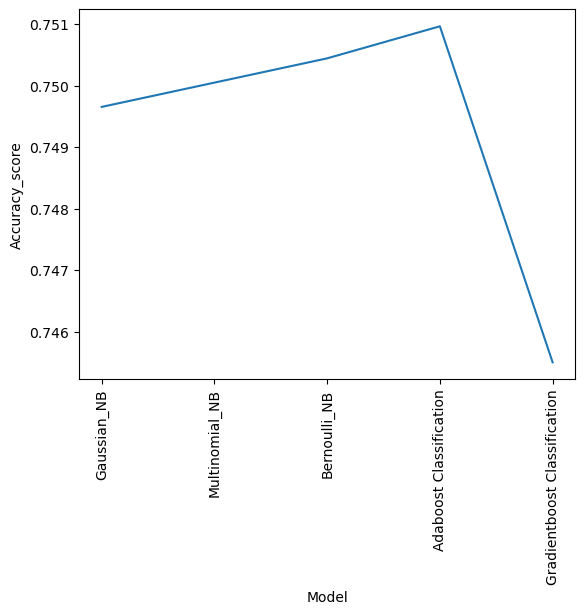

In [39]:
sns.lineplot(x=Acc_scores['Model'],y=Acc_scores['Accuracy_score'],data=Acc_scores)
plt.xticks(rotation=90)

# 1.AdaBoostRegressor model

In [45]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(base_estimator=lin_reg,n_estimators=17)
print('*'*100)
print('AdaBoost Regression Model')
print('*'*100)
print('\n Training Phase')
ada.fit(xtrain,ytrain)
print('Hyperparameter:\n',ada.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_ada=ada.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)

#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('Adaboost Regression - Performance Measures')
print('*'*100)
Accuracy_ada=r2_score(ytest,ypred_ada)
MSE_ada=mean_squared_error(ytest,ypred_ada)
RMSE_ada=np.sqrt(mean_squared_error(ytest,ypred_ada))
print('Accuracy Score - Adaboost Regression:\t',Accuracy_ada)
print()
print('MSE-Adaboost Regression:\t',MSE_ada)
print()
print('RMSE Adaboost Regression:\t',RMSE_ada)

****************************************************************************************************
AdaBoost Regression Model
****************************************************************************************************

 Training Phase


C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Hyperparameter:
 {'base_estimator__copy_X': True, 'base_estimator__fit_intercept': True, 'base_estimator__n_jobs': None, 'base_estimator__positive': False, 'base_estimator': LinearRegression(), 'estimator': None, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 17, 'random_state': None}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
Adaboost Regression - Performance Measures
****************************************************************************************************
Accuracy Score - Adaboost Regression:	 0.33252089843321675

MSE-Adaboost Regression:	 0.12500471527746757

RMSE Adaboost Regression:	 0.35356005893973314


# 2 GradientBoostRegressor model

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
grad_boost=GradientBoostingRegressor(n_estimators=15)
print('*'*100)
print('GradientBoosting Regression Model')
print('*'*100)
print('\n Training Phase')
grad_boost.fit(xtrain,ytrain)
print('Hyperparameter:\n',grad_boost.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_grad_boost=grad_boost.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)


#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('GradientBoosting Regression - Performance Measures')
print('*'*100)
Accuracy_grad_boost=r2_score(ytest,ypred_grad_boost)
MSE_grad_boost=mean_squared_error(ytest,ypred_grad_boost)
RMSE_grad_boost=np.sqrt(mean_squared_error(ytest,ypred_grad_boost))
print('Accuracy Score - GradientBoosting Regression:\t',Accuracy_grad_boost)
print()
print('MSE-GradientBoosting Regression:\t',MSE_grad_boost)
print()
print('RMSE GradientBoosting Regression:\t',RMSE_grad_boost)

****************************************************************************************************
GradientBoosting Regression Model
****************************************************************************************************

 Training Phase


C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Hyperparameter:
 {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
GradientBoosting Regression - Performance Measures
****************************************************************************************************
Accuracy Score - GradientBoosting Regression:	 0.31871775051010065

MSE-GradientBoosting Regression:	 0.12758975287941154

RMSE GradientBoosting Regression:	 0.357197078486669


# Model with Accuracy scores

In [46]:
scores=[('Linear Regression',Accuracy_lin_reg),
 ('Decision Tree Regression',Accuracy_dt_reg),
 ('Adaboost Regressor',Accuracy_ada),
 ('Gradient Boost Regressor',Accuracy_grad_boost),
 
 ]
Acc_scores=pd.DataFrame(scores,columns=['Model','Accuracy_score'])
print(Acc_scores.sort_values(by='Accuracy_score',ascending=False))

                      Model  Accuracy_score
2        Adaboost Regressor        0.332521
0         Linear Regression        0.332512
1  Decision Tree Regression        0.318909
3  Gradient Boost Regressor        0.318718


([0, 1, 2, 3],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Decision Tree Regression'),
  Text(2, 0, 'Adaboost Regressor'),
  Text(3, 0, 'Gradient Boost Regressor')])

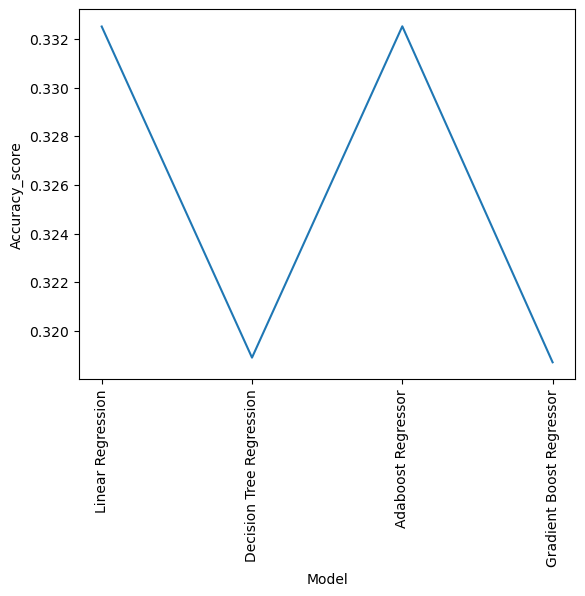

In [48]:
sns.lineplot(x=Acc_scores['Model'],y=Acc_scores['Accuracy_score'],data=Acc_scores)
plt.xticks(rotation=90)
